Plots: GalaxyPlotter
====================

This example illustrates how to plot a `Galaxy` using a `GalaxyPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a `Galaxy` with multiple `LightProfile`'s and a `MassProfile`.

In [2]:
bulge = al.lp.EllipticalSersic(
    centre=(0.0, -0.05),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, phi=45.0),
    intensity=4.0,
    effective_radius=0.6,
    sersic_index=3.0,
)

disk = al.lp.EllipticalExponential(
    centre=(0.0, 0.05),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, phi=30.0),
    intensity=2.0,
    effective_radius=1.6,
)

mass = al.mp.EllipticalIsothermal(
    centre=(0.0, 0.0),
    einstein_radius=0.8,
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, phi=45.0),
)

galaxy = al.Galaxy(redshift=0.5, bulge=bulge, disk=disk, mass=mass)

We also need the 2D grid the `Galaxy`'s `Profile`'s are evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the galaxy and grid to a `GalaxyPlotter` and call various `figure_*` methods to 
plot different attributes.

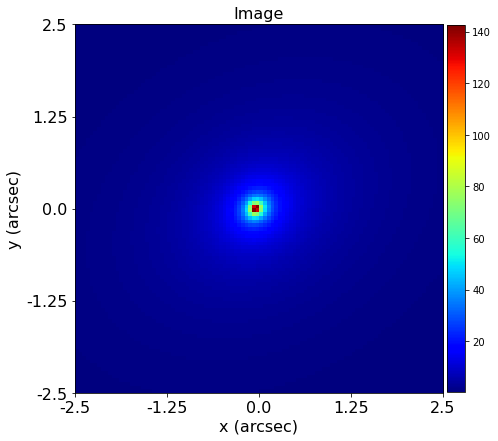

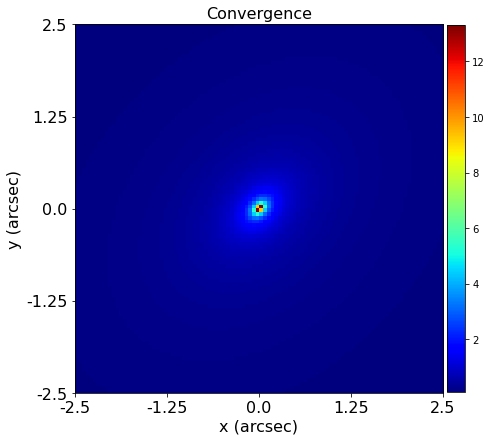

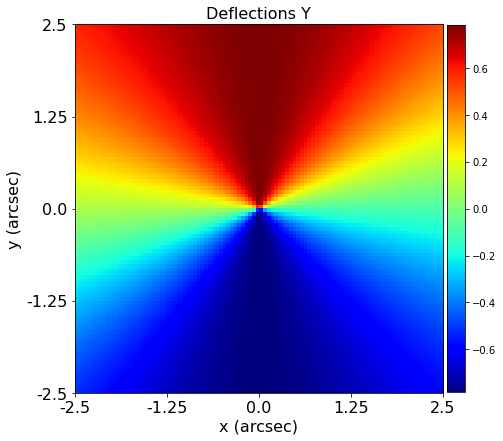

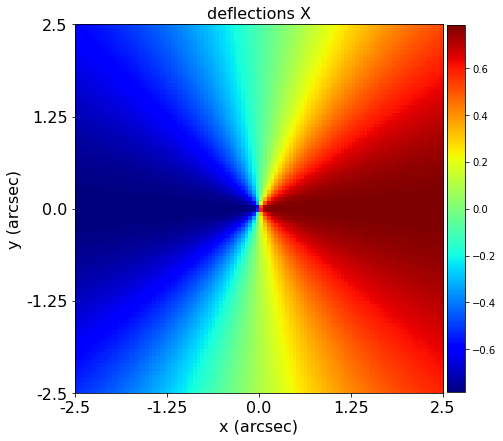

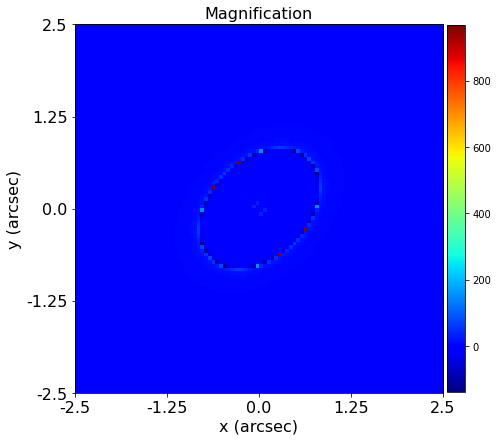

In [4]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy, grid=grid)
galaxy_plotter.figures(
    image=True,
    convergence=True,
    potential=False,
    deflections_y=True,
    deflections_x=True,
    magnification=True,
)

The `GalaxyPlotter` also has subplot method that plot each individual `Profile` in 2D as well as a 1D plot showing all
`Profiles` together.

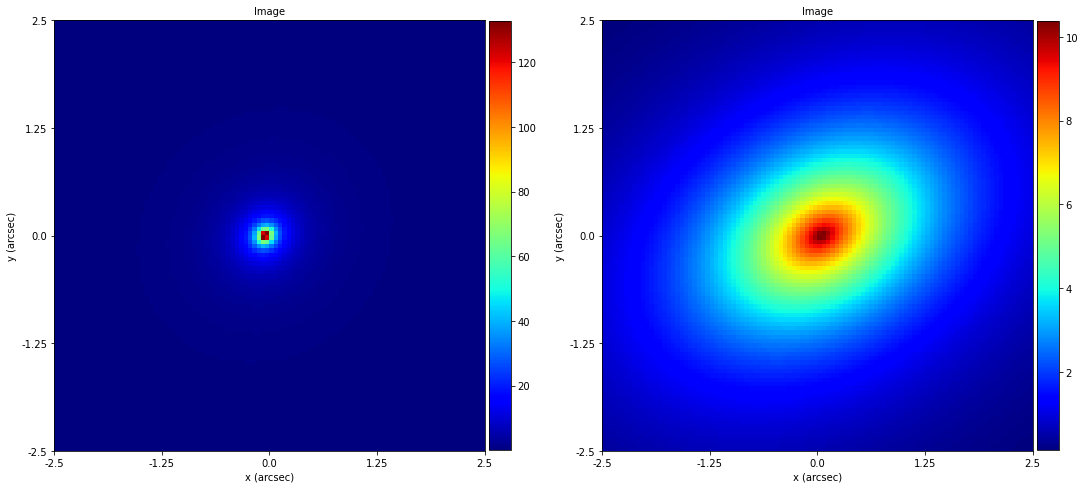

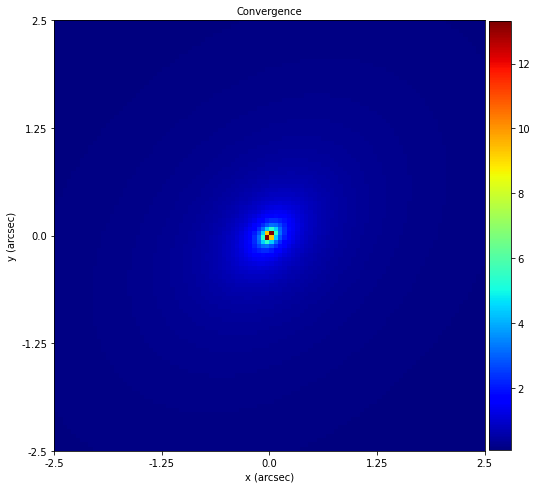

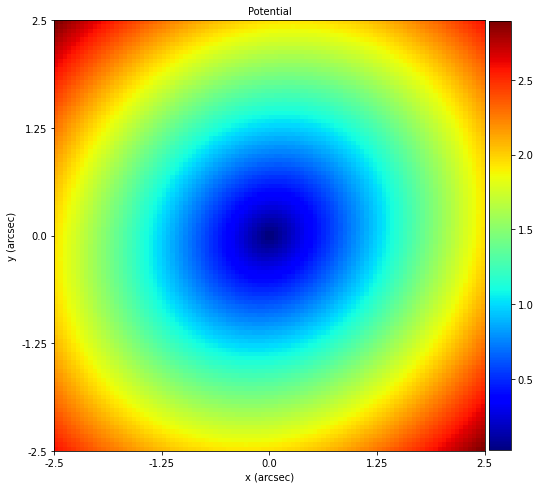

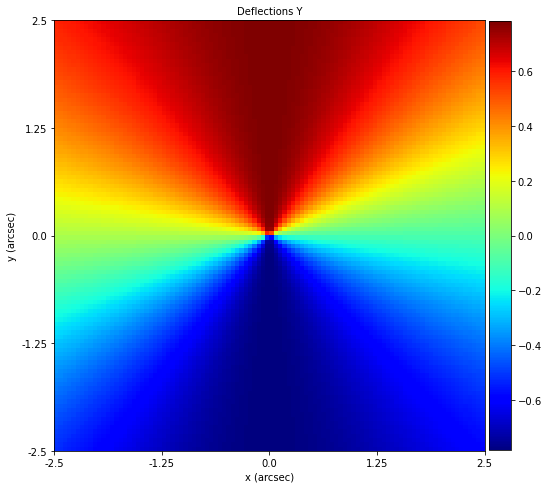

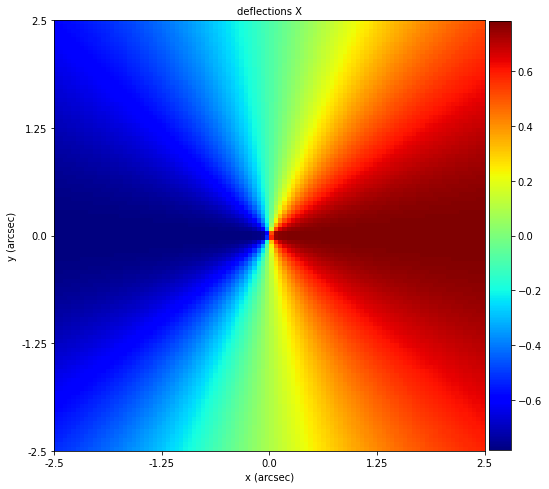

In [5]:
galaxy_plotter.subplot_of_light_profiles(image=True)
galaxy_plotter.subplot_of_mass_profiles(
    convergence=True, potential=True, deflections_y=True, deflections_x=True
)

A `Galaxy` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

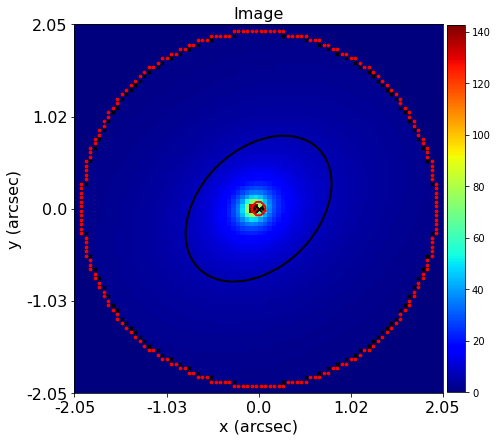

In [6]:
mask = al.Mask2D.circular(
    shape_native=grid.shape_native,
    pixel_scales=grid.pixel_scales,
    radius=2.0,
    sub_size=grid.sub_size,
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    light_profile_centres=True,
    mass_profile_centres=True,
    critical_curves=True,
)
galaxy_plotter = aplt.GalaxyPlotter(
    galaxy=galaxy, grid=masked_grid, include_2d=include_2d
)
galaxy_plotter.figures(image=True)

Finish.